# Neural Net using BitcoinHeistData

Inspired by: https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

Intro here...

# Load and process the data

In [1]:
import pandas as pd
df = pd.read_csv('BitcoinHeistData.csv')
df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


Split the dataset into our input features (X) and the label (Y) we wish to predict.

In [2]:
import numpy as np

X=df.iloc[:, 3:9]
Ytmp=df.iloc[:, -1]

print(X.shape)
print(Ytmp.shape)

print(X)
print(Ytmp)

# Convert the label to true false for simplicity
Y = Ytmp.str.contains('white')
print(Y)
numWhite = np.count_nonzero(Y)
print(numWhite/len(Y))

(2916697, 6)
(2916697,)
         length     weight  count  looped  neighbors        income
0            18   0.008333      1       0          2  1.000500e+08
1            44   0.000244      1       0          1  1.000000e+08
2             0   1.000000      1       0          2  2.000000e+08
3            72   0.003906      1       0          2  7.120000e+07
4           144   0.072848    456       0          1  2.000000e+08
...         ...        ...    ...     ...        ...           ...
2916692       0   0.111111      1       0          1  1.255809e+09
2916693       0   1.000000      1       0          1  4.409699e+07
2916694       2  12.000000      6       6         35  2.398267e+09
2916695       0   0.500000      1       0          1  1.780427e+08
2916696     144   0.073972   6800       0          2  1.123500e+08

[2916697 rows x 6 columns]
0          princetonCerber
1           princetonLocky
2          princetonCerber
3          princetonCerber
4           princetonLocky
         

Normalize the data so one feature does not dominate.
Use a min-max scaler from scikit-learn which scales our data to be between 0 and 1.

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[1.25000000e-01, 4.28724811e-06, 0.00000000e+00, 0.00000000e+00,
        7.74053719e-05, 1.40199911e-06],
       [3.05555556e-01, 1.25602972e-07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.40099840e-06],
       [0.00000000e+00, 5.14469773e-04, 0.00000000e+00, 0.00000000e+00,
        7.74053719e-05, 3.40242469e-06],
       ...,
       [1.38888889e-02, 6.17363727e-03, 3.44922737e-04, 4.13907285e-04,
        2.63178265e-03, 4.73991240e-05],
       [0.00000000e+00, 2.57234886e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.96296491e-06],
       [1.00000000e+00, 3.80565701e-05, 4.69025938e-01, 0.00000000e+00,
        7.74053719e-05, 1.64817455e-06]])

Split the dataset for a validation set and a test set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2041687, 6) (437505, 6) (437505, 6) (2041687,) (437505,) (437505,)


# Build and train the Neural Network

Use Keras to build the neural net.

In [5]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [6]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

We do so below:

In [7]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code. The function is called 'fit' as we are fitting the parameters to the data. We specify:
- what data we are training on, which is X_train and Y_train
- the size of our mini-batch 
- how long we want to train it for (epochs)
- what our validation data is so that the model will tell us how we are doing on the validation data at each point.

This function will output a history, which we save under the variable hist. We'll use this variable a little later.

In [8]:
# Usually train with 100 epochs, but each epoch same here (issue?)
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=5,
          validation_data=(X_val, Y_val))

Epoch 1/5
63803/63803 [==============================] - 36s 471us/step - loss: 0.0836 - accuracy: 0.9854 - val_loss: 0.0726 - val_accuracy: 0.9862
Epoch 2/5
63803/63803 [==============================] - 30s 469us/step - loss: 0.0741 - accuracy: 0.9859 - val_loss: 0.0725 - val_accuracy: 0.9862
Epoch 3/5
63803/63803 [==============================] - 30s 470us/step - loss: 0.0749 - accuracy: 0.9857 - val_loss: 0.0726 - val_accuracy: 0.9862
Epoch 4/5
63803/63803 [==============================] - 30s 471us/step - loss: 0.0746 - accuracy: 0.9857 - val_loss: 0.0725 - val_accuracy: 0.9862
Epoch 5/5
63803/63803 [==============================] - 30s 469us/step - loss: 0.0745 - accuracy: 0.9857 - val_loss: 0.0725 - val_accuracy: 0.9862


Evaluating our data on the test set:

In [9]:
model.evaluate(X_test, Y_test)[1]

13673/13673 [==============================] - 4s 321us/step - loss: 0.0749 - accuracy: 0.9857


0.98565274477005

# Visualizing Loss and Accuracy

In [10]:
import matplotlib.pyplot as plt

We want to visualize the training loss and the validation loss like this:

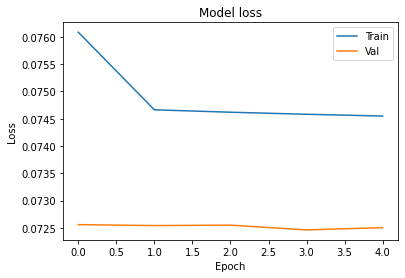

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

print(hist.history.keys())

We can also visualize the training accuracy and the validation accuracy like this:

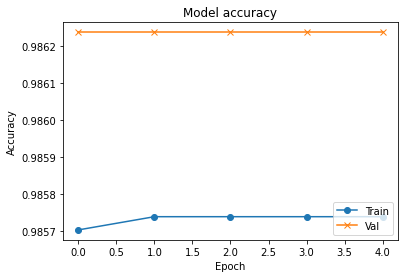

In [15]:
plt.plot(hist.history['accuracy'], '-o')
plt.plot(hist.history['val_accuracy'], '-x')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.ylim(0.95, 1)
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [14]:
print(X_test.shape)
print(Y_test.shape)
print(type(X_test))
print(type(Y_test))
print(hist.params)
print(hist.history.keys())

# Look at results where label is not 'white'.  Do we ever predict a heist?
#print(X_test[1,:])
#fooY = Y_test.to_numpy()
#print(fooY[1])
#idxWhite = np.where(Y_test)[0]
#print(type(idxWhite))
#print(idxWhite.shape)
#model.evaluate(X_test[idxWhite,:], Y_test[idxWhite])

#for i in range(X_test):
#    xt = X_test[i]
#    yt = Y_test[i]
#    model.evaluate(xt, yt)[1]
#    break;

(437505, 6)
(437505,)
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
{'verbose': 1, 'epochs': 5, 'steps': 63803}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
